In [10]:
#  — Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [12]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")

df.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [13]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [15]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["headline"])
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype                    
---  ------     --------------    -----                    
 0   headline   1407328 non-null  object                   
 1   url        1407328 non-null  object                   
 2   publisher  1407328 non-null  object                   
 3   date       55987 non-null    datetime64[ns, UTC-04:00]
 4   stock      1407328 non-null  object                   
dtypes: datetime64[ns, UTC-04:00](1), object(4)
memory usage: 53.7+ MB


In [16]:
df["headline"] = df["headline"].astype(str)

df["headline_length_chars"] = df["headline"].str.len()
df["headline_length_words"] = df["headline"].str.split().str.len()

df[["headline", "headline_length_chars", "headline_length_words"]].head()


,headline,headline_length_chars,headline_length_words
0,Stocks That Hit 52-Week Highs On Friday,39,7
1,Stocks That Hit 52-Week Highs On Wednesday,42,7
2,71 Biggest Movers From Friday,29,5
3,46 Stocks Moving In Friday's Mid-Day Session,44,7
4,B of A Securities Maintains Neutral on Agilent...,87,14


In [17]:
df[["headline_length_chars", "headline_length_words"]].describe()


,headline_length_chars,headline_length_words
count,1.407328e+06,1.407328e+06
mean,7.312051e+01,1.141671e+01
std,4.073531e+01,6.352997e+00
min,3.000000e+00,1.000000e+00
25%,4.700000e+01,7.000000e+00
50%,6.400000e+01,1.000000e+01
75%,8.700000e+01,1.300000e+01
max,5.120000e+02,7.700000e+01


In [ ]:
#publisher counts
publisher_counts = df["publisher"].value_counts()
publisher_counts.head(20)


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

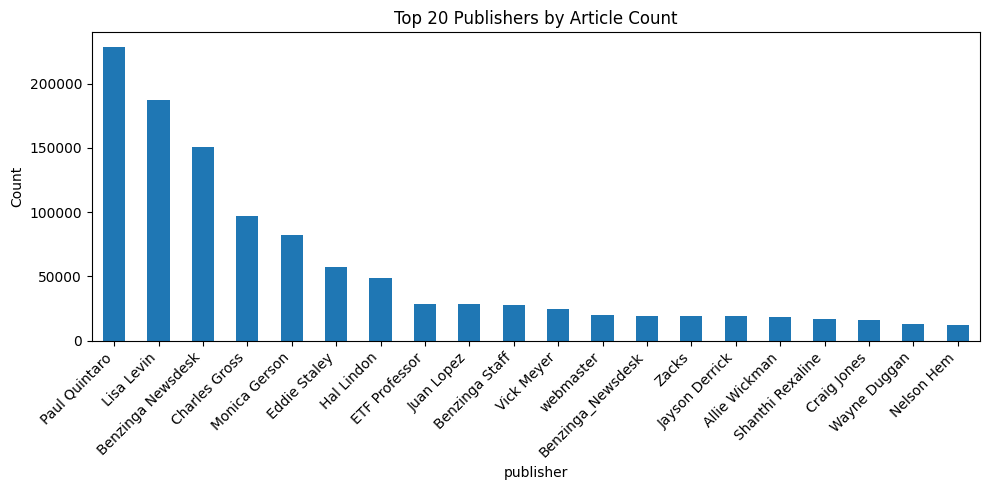

In [19]:
# Plot top 20 publishers by article count
plt.figure(figsize=(10,5))
publisher_counts.head(20).plot(kind="bar")
plt.title("Top 20 Publishers by Article Count")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
# Date feature extraction
df["date_only"] = df["date"].dt.date
df["weekday"] = df["date"].dt.day_name()
df["hour"] = df["date"].dt.hour

df[["date", "date_only", "weekday", "hour"]].head()


,date,date_only,weekday,hour
0,2020-06-05 10:30:54-04:00,2020-06-05,Friday,10.0
1,2020-06-03 10:45:20-04:00,2020-06-03,Wednesday,10.0
2,2020-05-26 04:30:07-04:00,2020-05-26,Tuesday,4.0
3,2020-05-22 12:45:06-04:00,2020-05-22,Friday,12.0
4,2020-05-22 11:38:59-04:00,2020-05-22,Friday,11.0


In [21]:
#  Daily article counts
daily_counts = df.groupby("date_only")["headline"].count()
daily_counts.head()


date_only
2011-04-27    1
2011-04-28    2
2011-04-29    2
2011-04-30    1
2011-05-01    1
Name: headline, dtype: int64

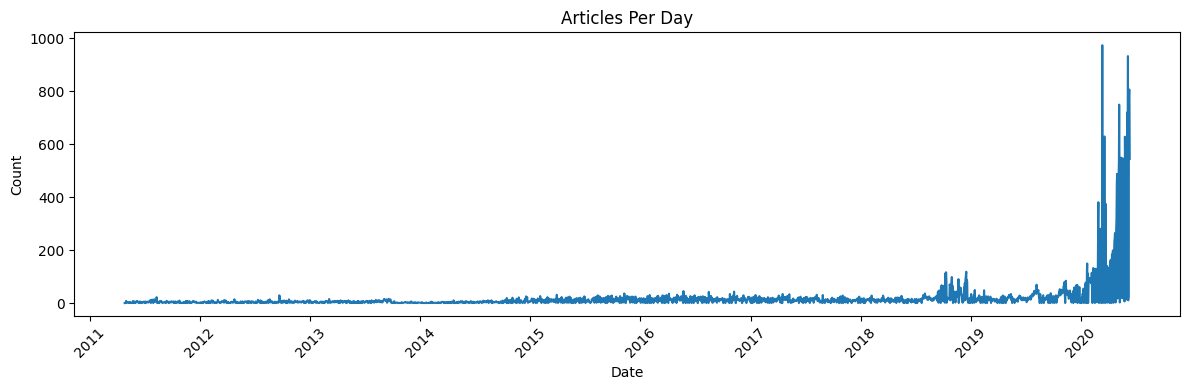

In [ ]:
# Plot daily article counts
plt.figure(figsize=(12,4))
daily_counts.plot()
plt.title("Articles Per Day")
plt.ylabel("Count")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


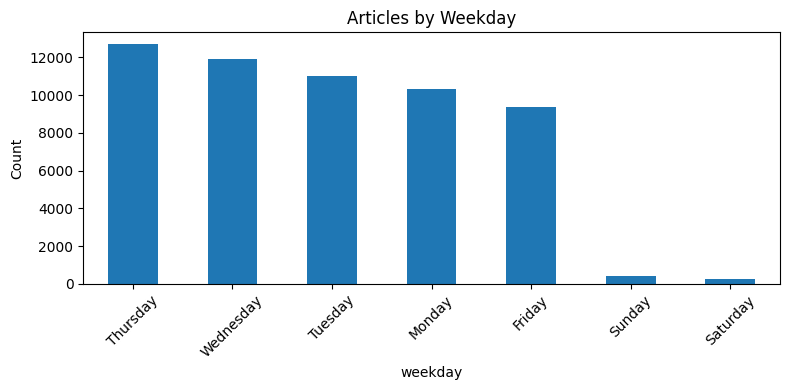

In [23]:
weekday_counts = df["weekday"].value_counts()
weekday_counts
# Plot weekday article counts
plt.figure(figsize=(8,4))
weekday_counts.plot(kind="bar")
plt.title("Articles by Weekday")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



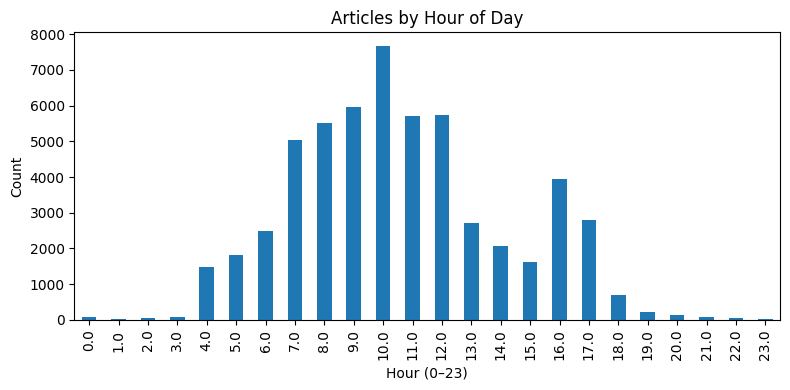

In [24]:
hour_counts = df["hour"].value_counts().sort_index()
hour_counts
# Plot hourly article counts
plt.figure(figsize=(8,4))
hour_counts.plot(kind="bar")
plt.title("Articles by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [28]:
# Extract publisher domain from email-like publisher strings
publisher_str = df["publisher"].astype(str)
is_email = publisher_str.str.contains("@")

df["publisher_domain"] = np.where(
    is_email,
    publisher_str.str.split("@").str[-1],
    np.nan
)

df[["publisher", "publisher_domain"]].head(10)


,publisher,publisher_domain
0,Benzinga Insights,NaN
1,Benzinga Insights,NaN
2,Lisa Levin,NaN
3,Lisa Levin,NaN
4,Vick Meyer,NaN
5,vishwanath@benzinga.com,benzinga.com
6,vishwanath@benzinga.com,benzinga.com
7,Benzinga Newsdesk,NaN
8,vishwanath@benzinga.com,benzinga.com
9,Lisa Levin,NaN


In [26]:
#most common publisher domains
domain_counts = df["publisher_domain"].value_counts(dropna=True)
domain_counts.head(20)


publisher_domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# LDA Topic Modeling Function
def topic_model_from_texts(
    texts,
    n_topics=5,
    n_top_words=10,
    max_df=0.95,
    min_df=20,
    stop_words="english",
):
    """
    Train an LDA topic model on a list of text documents.
    Returns:
    - lda_model
    - vectorizer
    - topics (list of keywords per topic)
    """
    
    vectorizer = CountVectorizer(
        stop_words=stop_words,
        max_df=max_df,
        min_df=min_df,
    )
    X = vectorizer.fit_transform(texts)

    lda_model = LatentDirichletAllocation(
        n_components=n_topics,
        learning_method="batch",
        random_state=42
    )
    lda_model.fit(X)

    feature_names = vectorizer.get_feature_names_out()
    topics = []

    for topic_idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_indices]
        topics.append(top_words)

    return lda_model, vectorizer, topics


In [29]:
sample = df["headline"].astype(str).sample(50000, random_state=42)
len(sample)
# Train LDA model on sample headlines
lda_model, vectorizer, topics = topic_model_from_texts(
    sample,
    n_topics=5,
    n_top_words=10,
)


In [30]:
#print topics
for i, words in enumerate(topics, start=1):
    print(f"Topic {i}: {', '.join(words)}")


Topic 1: shares, update, market, trading, higher, earnings, mid, lower, companies, markets
Topic 2: stocks, benzinga, market, session, earnings, moving, scheduled, day, mid, pre
Topic 3: pt, buy, raises, maintains, target, price, 00, downgrades, upgrades, initiates
Topic 4: vs, est, eps, reports, sales, stocks, estimate, 52, sees, q1
Topic 5: new, announces, says, yesterday, movers, week, reports, 52, stocks, set
